In [2]:
import pandas as pd     
import matplotlib.pyplot as plt               
import numpy as np            
import seaborn as sns            
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from datetime import datetime as dt
from sklearn.preprocessing import OneHotEncoder

from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
df = pd.read_csv('E:\Python\ML\car\CAR DETAILS FROM CAR DEKHO.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
df.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner
4339,Renault KWID RXT,2016,225000,40000,Petrol,Individual,Manual,First Owner


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [6]:
df.shape

(4340, 8)

In [7]:
df.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(763)

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
def iqr(df,x):
    q1 = np.percentile(x,25)
    q3 = np.percentile(x,75)
    i = q3-q1
    lf = q1 - 1.5*i
    hf = q3 + 1.5*i
    df = df[(x >= lf) & (x <= hf)]
    return df
df = iqr(df,df['selling_price'])

In [11]:
df = iqr(df,df['km_driven'])


In [12]:
df['brand']=df['name'].str.split().str.get(0)

In [13]:
df['brand'].unique()

array(['Maruti', 'Hyundai', 'Datsun', 'Honda', 'Tata', 'Chevrolet',
       'Skoda', 'Toyota', 'Mercedes-Benz', 'Mahindra', 'Ford', 'Nissan',
       'Renault', 'Fiat', 'Volkswagen', 'Audi', 'Mitsubishi', 'Daewoo',
       'Force', 'OpelCorsa', 'BMW', 'Ambassador'], dtype=object)

In [14]:
df['brand'].nunique()

22

In [15]:
from sklearn import preprocessing 
  
label_encoder = preprocessing.LabelEncoder() 
  
df['brand_code']= label_encoder.fit_transform(df['brand']) 
df['seller_type_code']= label_encoder.fit_transform(df['seller_type']) 
df['transmission_code']= label_encoder.fit_transform(df['transmission']) 

In [16]:
df['fuel'].replace({'Diesel':1, 'Petrol':2, 'CNG':3, 'LPG':4, 'Electric':5}, inplace=True)

In [17]:
df['owner'].replace({'Test Drive Car':0, 'First Owner':1, 'Second Owner':2, 'Third Owner':3, 'Fourth & Above Owner':4}, inplace =True)

In [18]:
# columns = ['seller_type','transmission']
# encoder = OneHotEncoder(sparse_output=False)
# one_hot_encoded = encoder.fit_transform(df[columns])
# one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(columns))
# df_encoded = pd.concat([df, one_hot_df], axis=1)
# df_encoded

In [19]:
# cur_dt = dt.now()
# cur_year=cur_dt.year
df['car_age']=2021-df['year']
df['car_age']

0       14
1       14
2        9
3        4
4        7
        ..
4335     7
4336     7
4337    12
4338     5
4339     5
Name: car_age, Length: 3287, dtype: int64

In [20]:
df.drop('year', inplace=True,axis=1)

In [21]:
df = iqr(df,df['brand_code'])
df = iqr(df,df['car_age'])

In [22]:
df.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,brand,brand_code,seller_type_code,transmission_code,car_age
0,Maruti 800 AC,60000,70000,2,Individual,Manual,1,Maruti,12,1,1,14
1,Maruti Wagon R LXI Minor,135000,50000,2,Individual,Manual,1,Maruti,12,1,1,14
2,Hyundai Verna 1.6 SX,600000,100000,1,Individual,Manual,1,Hyundai,10,1,1,9
4,Honda Amaze VX i-DTEC,450000,141000,1,Individual,Manual,2,Honda,9,1,1,7
5,Maruti Alto LX BSIII,140000,125000,2,Individual,Manual,1,Maruti,12,1,1,14


In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
selling_price,2394.0,408551.545948,253217.579136,20000.0,210000.0,350000.0,580000.0,1200000.0
km_driven,2394.0,62421.099415,34998.241695,1.0,35000.0,60000.0,90000.0,165000.0
fuel,2394.0,1.606099,0.561902,1.0,1.0,2.0,2.0,4.0
owner,2394.0,1.476608,0.728843,0.0,1.0,1.0,2.0,4.0
brand_code,2394.0,10.841688,1.460870,7.0,10.0,11.0,12.0,15.0
seller_type_code,2394.0,0.804929,0.422864,0.0,1.0,1.0,1.0,2.0
transmission_code,2394.0,0.946115,0.225837,0.0,1.0,1.0,1.0,1.0
car_age,2394.0,7.900585,4.273082,1.0,4.0,7.0,11.0,21.0


In [24]:
df.describe(include='object').T

,count,unique,top,freq
name,2394,903,Maruti Swift Dzire VDI,52
seller_type,2394,3,Individual,1875
transmission,2394,2,Manual,2265
brand,2394,9,Maruti,1038


In [25]:
num_col = df.select_dtypes(include='int64').columns
num_col

Index(['selling_price', 'km_driven', 'fuel', 'owner', 'brand_code',
       'seller_type_code', 'transmission_code', 'car_age'],
      dtype='object')

In [26]:
cat_col = df.select_dtypes(include='object').columns.tolist()
cat_col

['name', 'seller_type', 'transmission', 'brand']

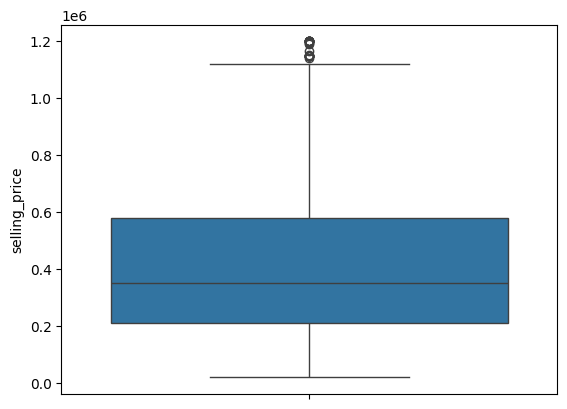

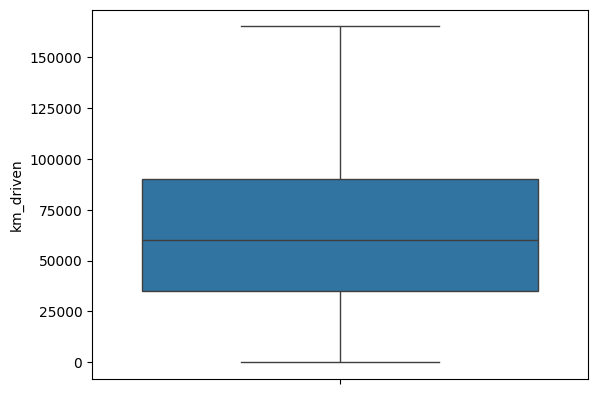

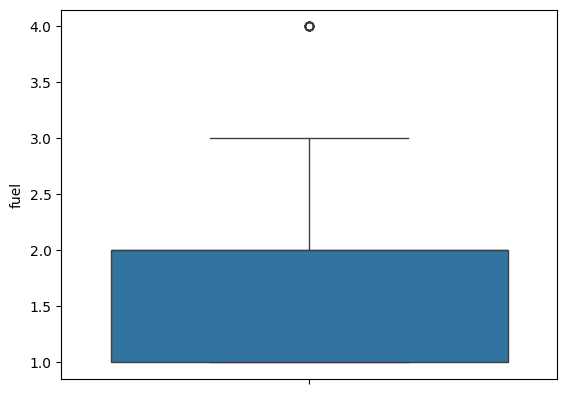

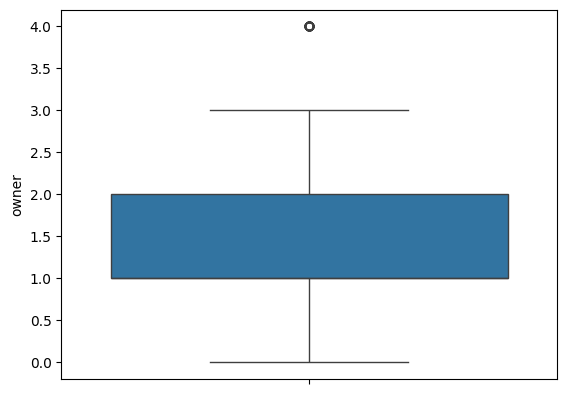

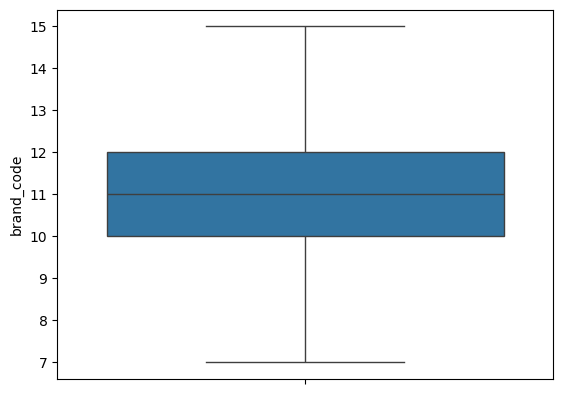

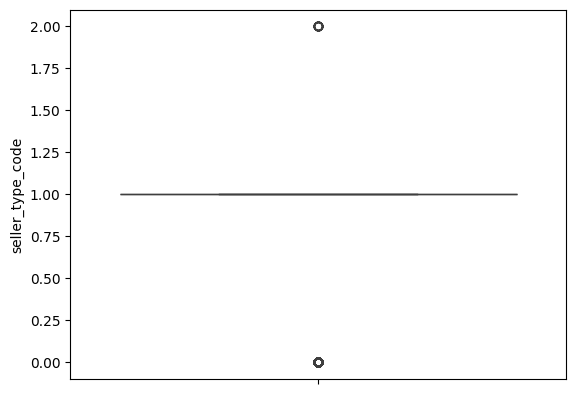

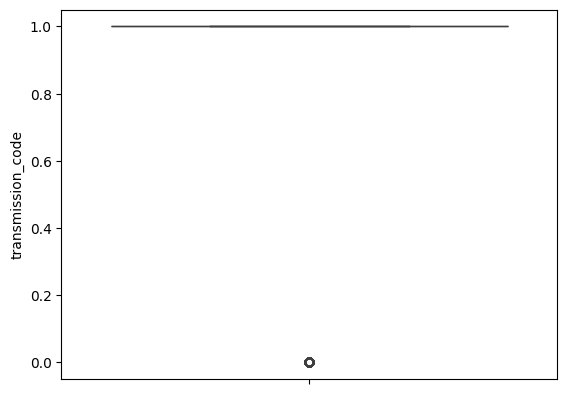

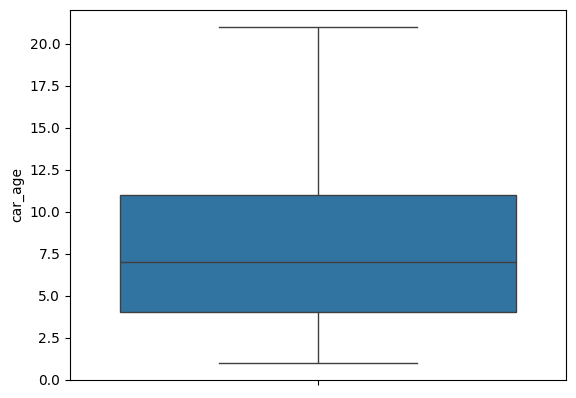

In [27]:
for col in num_col:
   
    sns.boxplot(df[col])
    plt.show()

<Axes: >

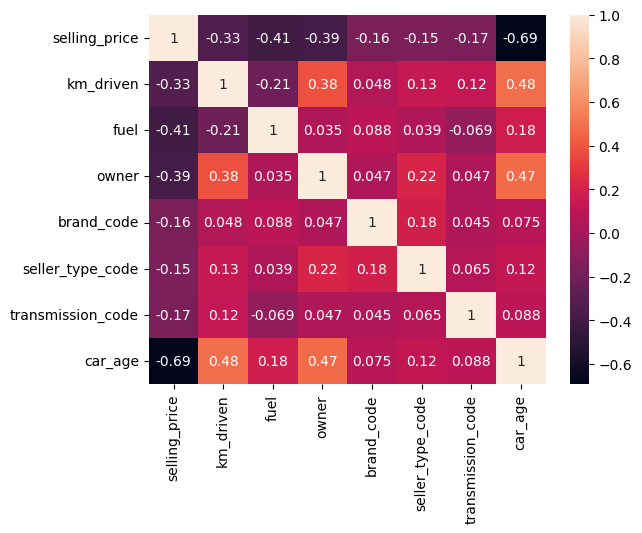

In [28]:
corr = df[num_col].corr()
sns.heatmap(corr, annot=True)

<Axes: xlabel='owner', ylabel='selling_price'>

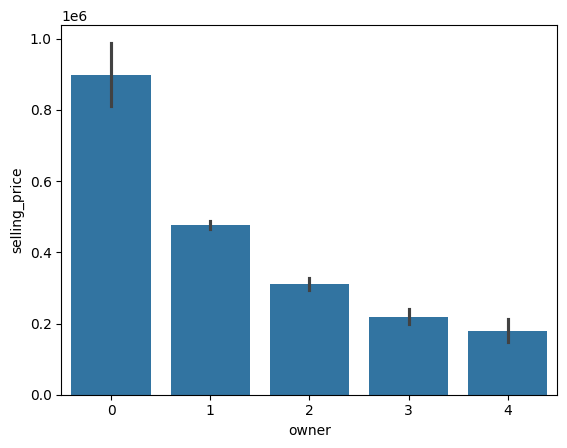

In [29]:
sns.barplot(data=df, x = 'owner', y = 'selling_price')

<Axes: xlabel='car_age', ylabel='selling_price'>

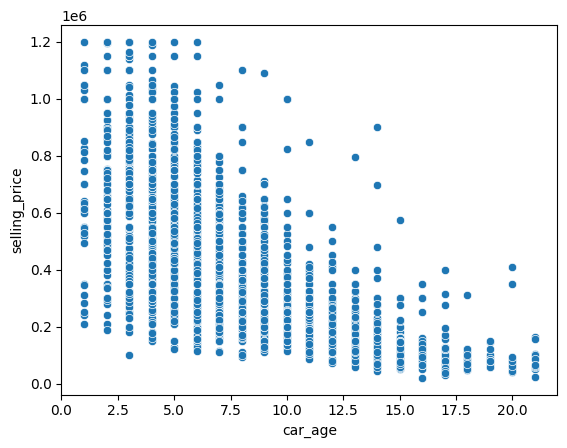

In [30]:
sns.scatterplot(data=df, x = 'car_age', y = 'selling_price')

<Axes: xlabel='km_driven', ylabel='selling_price'>

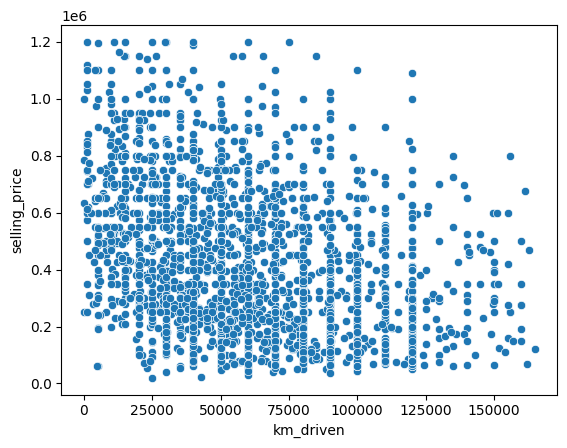

In [31]:
sns.scatterplot(data=df, x = 'km_driven', y = 'selling_price')

<Axes: xlabel='fuel', ylabel='selling_price'>

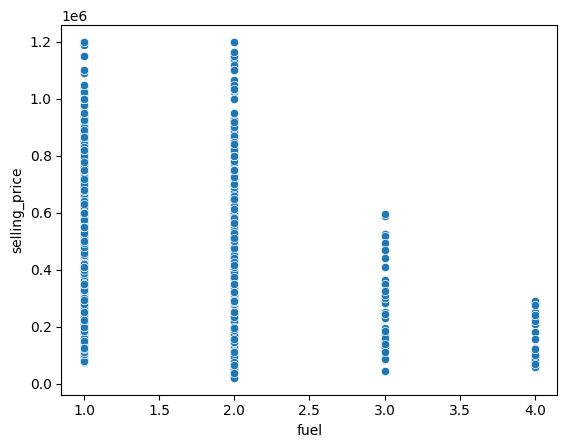

In [32]:
sns.scatterplot(data=df, x = 'fuel', y = 'selling_price')

<Axes: xlabel='brand_code', ylabel='selling_price'>

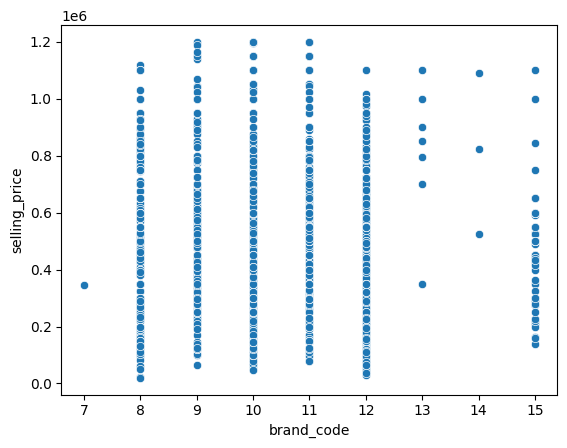

In [33]:
sns.scatterplot(data=df, x = 'brand_code', y = 'selling_price')

<Axes: xlabel='seller_type_code', ylabel='selling_price'>

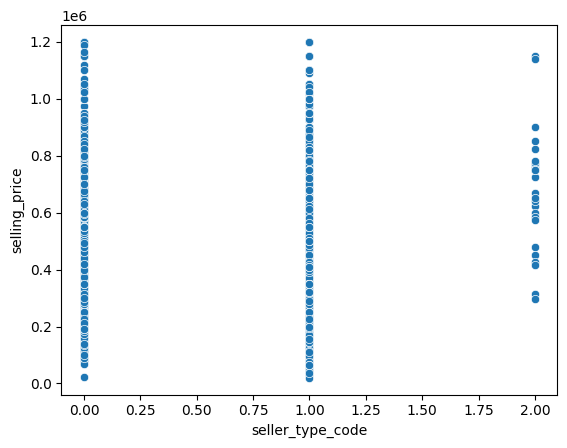

In [34]:
sns.scatterplot(data=df, x = 'seller_type_code', y = 'selling_price')

<Axes: xlabel='transmission_code', ylabel='selling_price'>

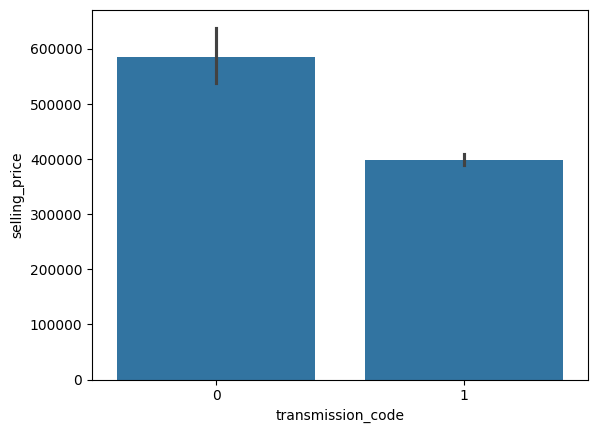

In [35]:
sns.barplot(data=df, x = 'transmission_code', y = 'selling_price')

In [36]:
X = np.array(df['car_age']).reshape(-1,1)
Y = np.array(df['selling_price']).reshape(-1,1)
X_test,X_train,Y_test,Y_train=train_test_split(X,Y,test_size=0.2,random_state=42)

In [37]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [38]:
y_pred=model.predict(X_test)

In [39]:
r2 = r2_score(Y_test,y_pred)
r2

0.48651103713121147

In [40]:
np.percentile(X,25)

np.float64(4.0)

In [41]:
df.shape

(2394, 12)

In [42]:
#df['selling_price'] = sorted(df['selling_price'], reverse = False)

In [43]:
max(df['selling_price'])

1200000

In [44]:
i = 0.25*(3577+1)
a = df['selling_price'].sort_values(ascending=True).head(894)
a

2662     20000
2495     22000
2444     30000
4290     37500
3215     40000
         ...  
49      275000
3201    277000
3908    280000
2106    280000
2810    280000
Name: selling_price, Length: 894, dtype: int64

In [45]:
i # position of the 25th percentile value

894.5

In [46]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=14)
X_poly = poly.fit_transform(X_train)

lin2=LinearRegression()
lin2.fit(X_poly,Y_train)

LinearRegression()

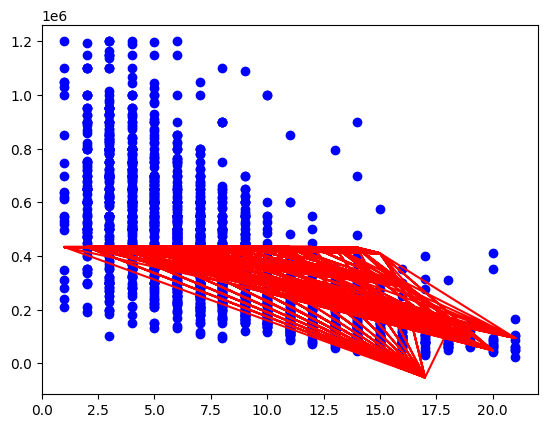

In [52]:
plt.scatter(X_test,Y_test, color='b')
plt.plot(X_test,lin2.predict(poly.fit_transform(X_test)), color='r')

In [48]:
for i in range(1,50):
    poly = PolynomialFeatures(degree=i)
    X_poly = poly.fit_transform(X_train)

    lin2=LinearRegression()
    lin2.fit(X_poly,Y_train)

    r2 = r2_score(Y_test,lin2.predict(poly.fit_transform(X_test)))

    if r2>0.48:
        print(r2,i)

0.48651103713121147 1
0.5047004711029157 2
0.5081450061325281 3
0.5094729969823777 4
0.5097380806490168 5
0.5098527289699617 6
0.5098689382117414 7
0.5094846933950361 8
0.5099786018603994 9
0.5096375002721922 10
0.5098708451453708 11
0.5097785531746737 12
0.5097088172180098 13
0.5102349767212717 14
0.5012989559405514 15
0.4932859942919595 16
0.48364899368926206 17


In [49]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(Y_test,lin2.predict(poly.fit_transform(X_test)))

np.float64(200442.31156916977)

In [50]:
from sklearn.metrics import mean_squared_error

mean_squared_error(Y_test,lin2.predict(poly.fit_transform(X_test)))

np.float64(59387672808.513)

In [51]:
from sklearn.metrics import root_mean_squared_error

root_mean_squared_error(Y_test,lin2.predict(poly.fit_transform(X_test)))

np.float64(243695.86128720568)